In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [4]:
df.sample()['clean_comment'].values

array(['winning '], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [7]:
df[df['clean_comment'].isnull()].head()

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0


In [8]:
df.duplicated().sum()

np.int64(449)

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isna().sum()

clean_comment    0
category         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df[df['clean_comment'].str.strip() == '']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [14]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [15]:
df.shape

(36793, 2)

In [16]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [17]:
df[df['clean_comment'].apply(lambda x: x.startswith(' ') | x.endswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [18]:
df['clean_comment'] = df['clean_comment'].str.strip()
df[df['clean_comment'].apply(lambda x: x.startswith(' ') | x.endswith(' '))].sum()

clean_comment    0
category         0
dtype: object

In [19]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comments_with_urls.head()

,clean_comment,category


In [20]:
df[df['clean_comment'].str.contains('\n')].head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [21]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=False)

df[df['clean_comment'].str.contains('\n')].sum()

clean_comment    0
category         0
dtype: object

### EDA

<Axes: xlabel='category', ylabel='count'>

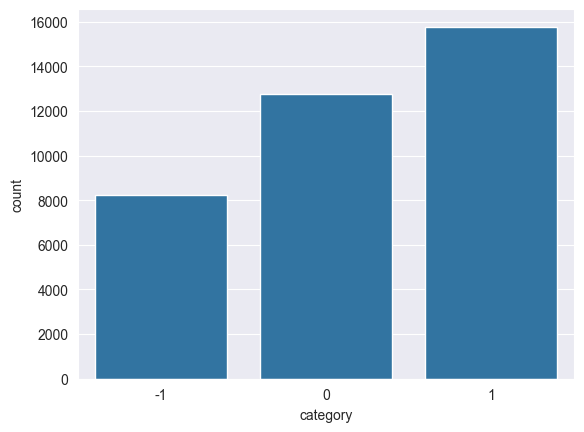

In [22]:
sns.countplot(data=df, x='category')

In [23]:
df['category'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

category
 1    42.86%
 0    34.71%
-1    22.42%
Name: proportion, dtype: object

In [24]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [25]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

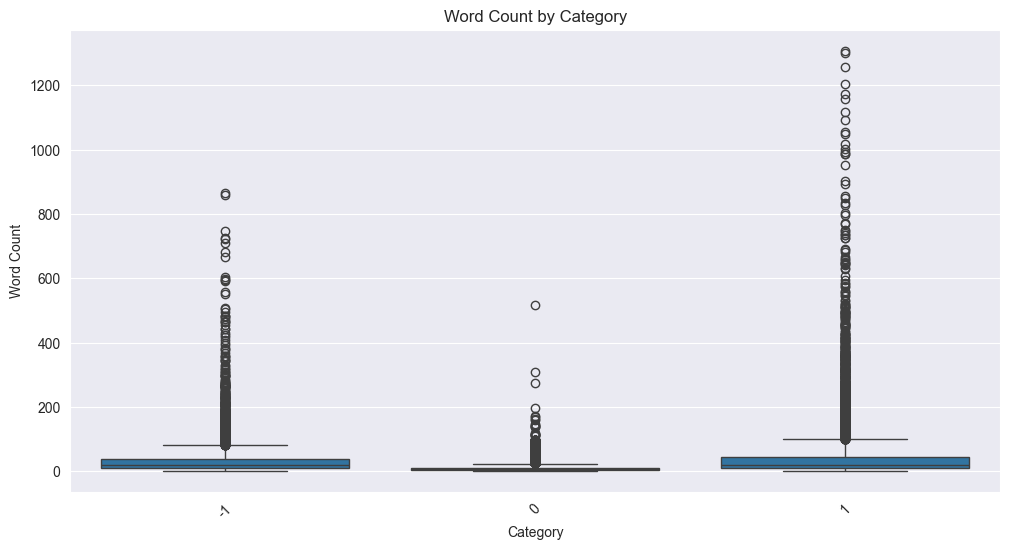

In [26]:
#plot of the category vs word count
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

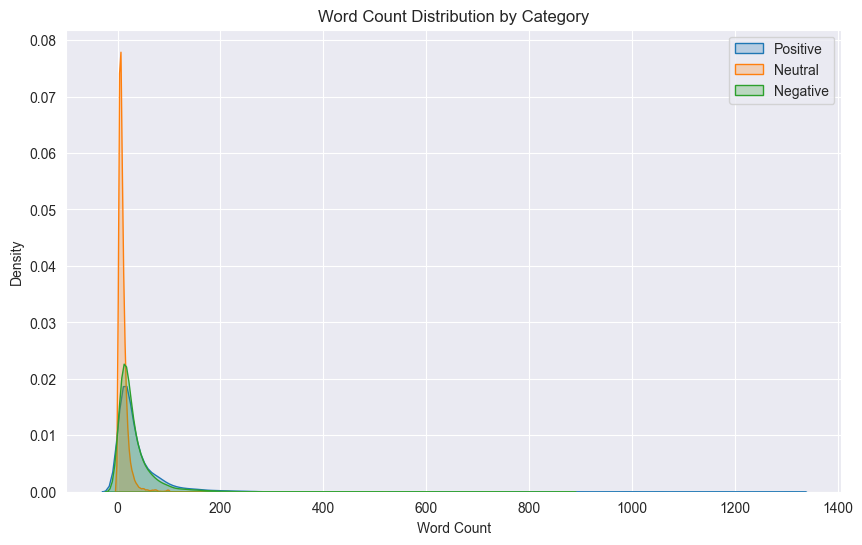

In [27]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [28]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\632366\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([ word for word in x.split() if word in stop_words]))

In [30]:
df.sample(4)

,clean_comment,category,word_count,num_stop_words
25951,how can sitting such large state waste much hi...,1,13,5
6453,what point will trident hit the £200bn mark th...,1,17,6
35463,trolled for urging people and vote the secular...,0,29,10
25652,results super delayed more than hundred seats ...,1,20,5


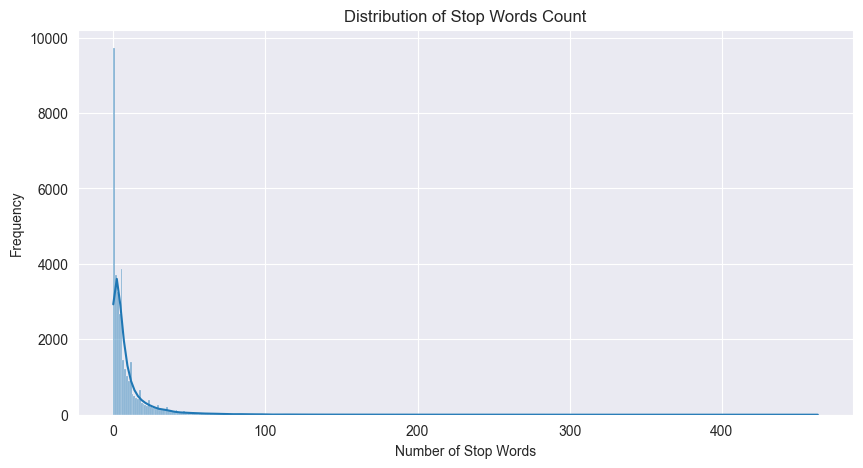

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Words Count')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

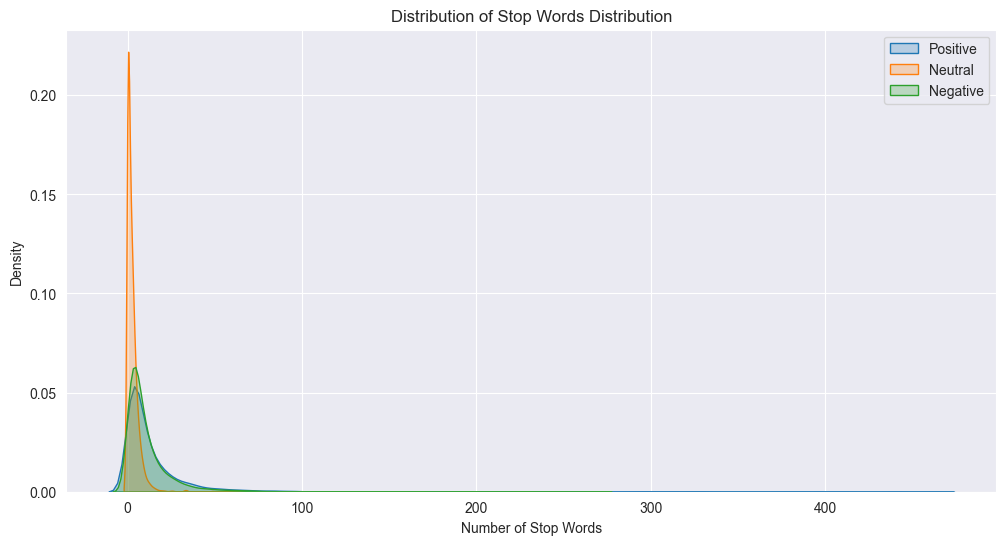

In [32]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)
plt.title('Distribution of Stop Words Distribution')
plt.xlabel('Number of Stop Words')
plt.ylabel('Density')
plt.legend()
plt.show()

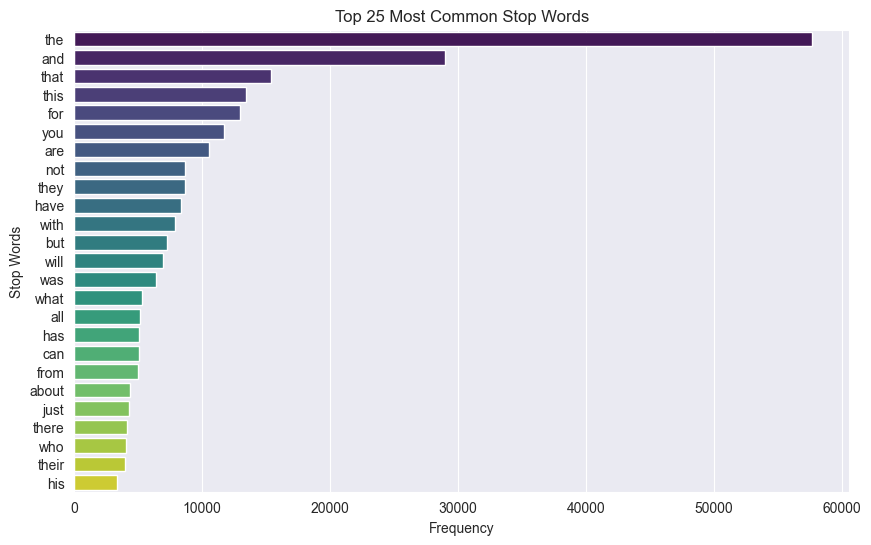

In [33]:
from collections import Counter

stopwords_count = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
common_stopwords = Counter(stopwords_count).most_common(25)
top_25_stopwords = pd.DataFrame(common_stopwords, columns=['word', 'frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_25_stopwords, x='frequency', y='word', palette='viridis', hue='word')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Frequency')
plt.ylabel('Stop Words')
plt.show()


In [34]:
all_text = ' '.join(df['clean_comment'])
char_freq = Counter(all_text)
char_freq_df = pd.DataFrame(char_freq.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [35]:
char_freq_df.tail(20)

,character,frequency
1376,т,1
1299,角,1
1300,衰,1
1350,ూ,1
1373,ണ,1
1374,р,1
1375,ч,1
1337,毫,1
1338,违,1
1339,逍,1


In [36]:
df['clean_comment'] = df['clean_comment'].apply(remove_stopwords)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None, k=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:k]


top_25_bigrams = get_top_ngram(df['clean_comment'], n=2, k=25)
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'frequency'])
top_25_trigams = get_top_ngram(df['clean_comment'], n=3, k=25)
top_25_trigrams_df = pd.DataFrame(top_25_trigams, columns=['trigram', 'frequency'])

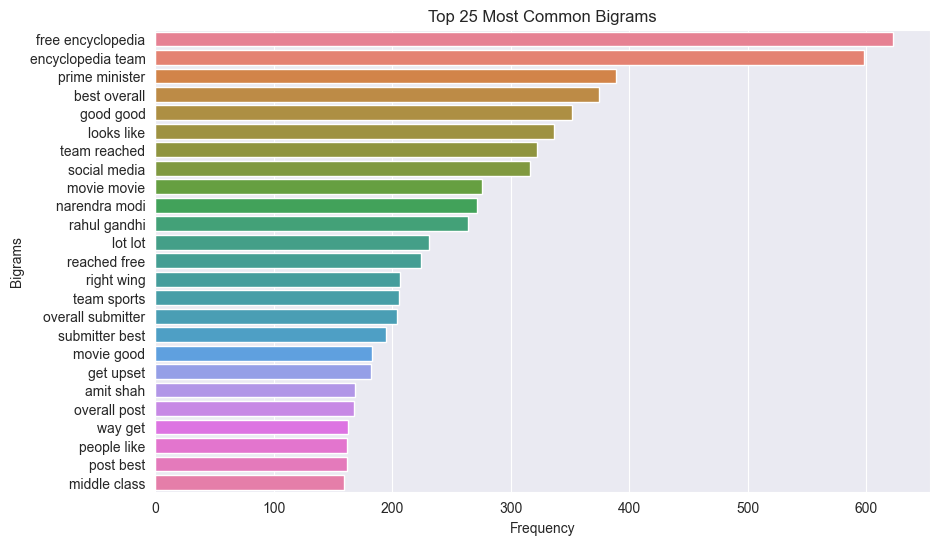

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_25_bigrams_df, x='frequency', y='bigram', hue='bigram')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

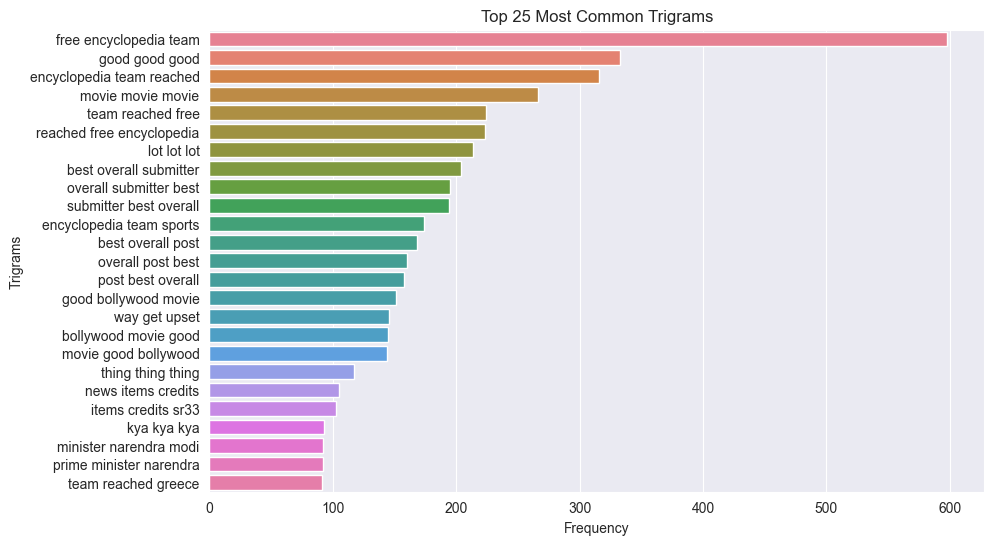

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_25_trigrams_df, x='frequency', y='trigram', hue='trigram')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

In [40]:
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^a-zA-Z\s!?.,]', '', str(x)))

In [41]:
all_text = ' '.join(df['clean_comment'])
char_freq = Counter(all_text)
char_freq_df = pd.DataFrame(char_freq.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [42]:
char_freq_df

,character,frequency
6,,729561
10,e,502309
1,a,367008
3,i,347587
9,n,309981
12,t,307337
16,s,296382
7,o,283027
8,r,268819
4,l,217895


In [43]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\632366\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

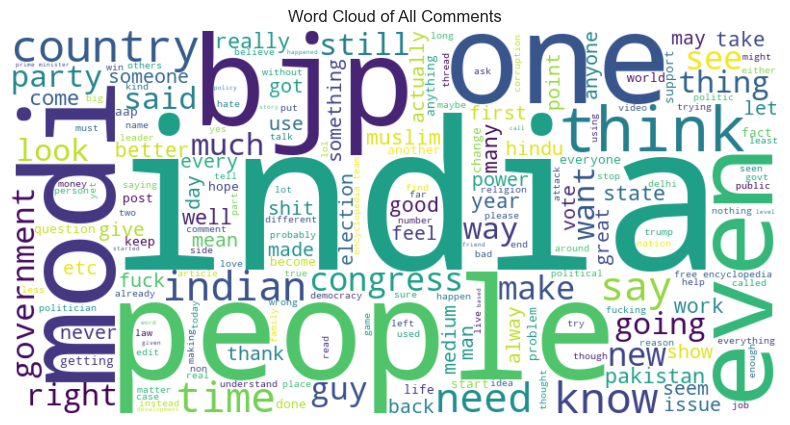

In [47]:
plot_wordcloud(df['clean_comment'], 'Word Cloud of All Comments')

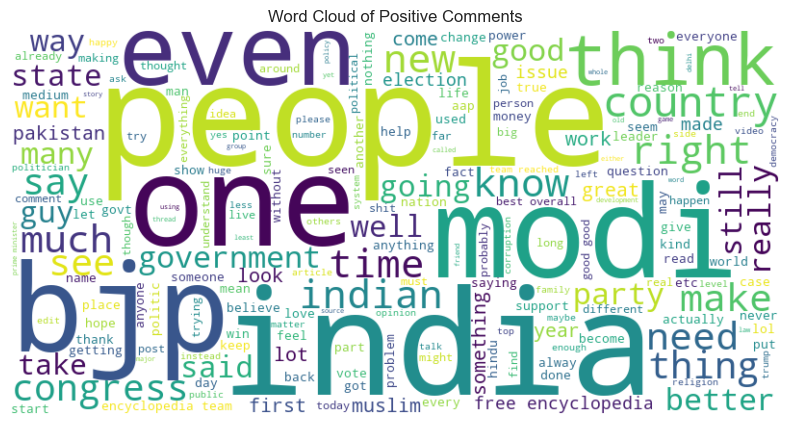

In [48]:
plot_wordcloud(df[df['category'] == 1]['clean_comment'], 'Word Cloud of Positive Comments')

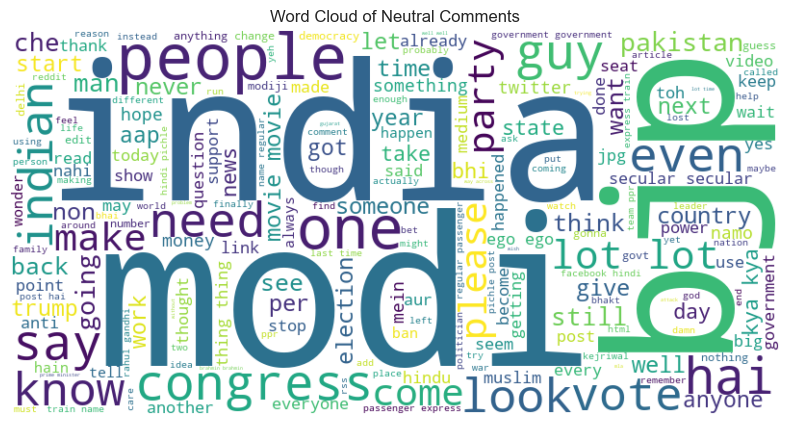

In [49]:
plot_wordcloud(df[df['category'] == 0]['clean_comment'], 'Word Cloud of Neutral Comments')

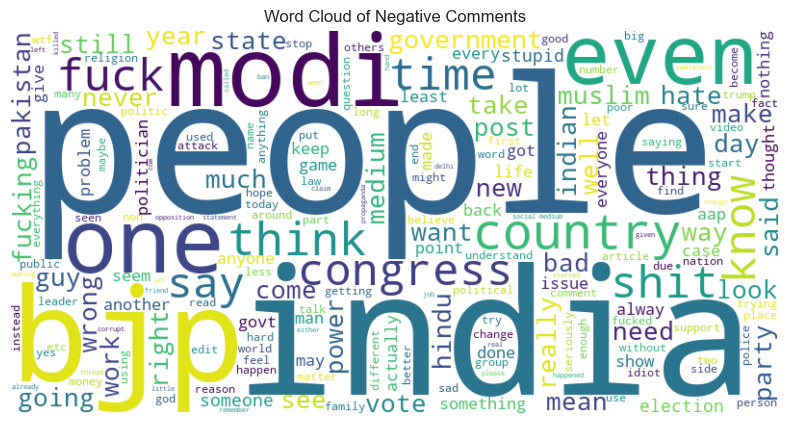

In [50]:
plot_wordcloud(df[df['category'] == -1]['clean_comment'], 'Word Cloud of Negative Comments')